### The Problem
The data we will be using is admission data on Grad school acceptances.

* `admit`: whether or not the applicant was admitted to grad. school
* `gpa`: undergraduate GPA
* `gre`: score of GRE test
* `rank`: prestige of undergraduate school (1 is highest prestige, ala Harvard)

We will use the GPA, GRE, and rank of the applicants to try to predict whether or not they will be accepted into graduate school.

Before we get to predictions, we should do some data exploration.

1. Load in the dataset into pandas: `grad.csv`.

2. Use the pandas `describe` method to get some preliminary summary statistics on the data. In particular look at the mean values of the features.

3. Use the pandas `crosstab` method to see how many applicants from each rank of school were accepted. You should get a dataframe that looks like this:

    ```
    rank    1   2   3   4
    admit
    0      28  ..  ..  ..
    1      33  ..  ..  ..
    ```

    Make a bar plot of the percent of applicants from each rank who were accepted. You can do `.plot(kind="bar")` on a pandas dataframe.

4. What does the distribution of the GPA and GRE scores look like? Do the distributions differ much?

    Hint: Use the pandas `hist` method.

5. One of the issues with classification can be unbalanced classes. What percentage of the data was admitted? Do you think this will be a problem?

6. Perform a Logistic Regression. (Do you need to change the `rank` column?)
 
7. Use Cross Validation so the model doesn't overfit the data. Ktest

8. What's your accuracy?

9. What is better to have, a higher recall or precison in the context of admitting someone into graduate school.
Whichever metric you choose, what is the value from your model?





C:\Users\ekzc5h6\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
%matplotlib inline
from sklearn import linear_model
from sklearn.model_selection import cross_val_score

from itertools import combinations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas.plotting import scatter_matrix 
from sklearn import linear_model
from sklearn.model_selection import train_test_split
%matplotlib inline
pd.options.display.max_colwidth = 100

from IPython.core.display import HTML

#def short_summary(est):
#    return HTML(est.summary().tables[i].as_html())

def dummify(df,column):
    dummy = pd.get_dummies(df[column]).rename(columns = lambda x: column+'_'+str(x)).iloc[:,0:len(df[column].unique())-1]
    df = df.drop(column, axis =1)
    return pd.concat([df,dummy],axis=1)


In [7]:
df = pd.read_csv('grad.csv')

In [22]:
df.head(10)

admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4
5      1  760  3.00     2
6      1  560  2.98     1
7      0  400  3.08     2
8      1  540  3.39     3
9      0  700  3.92     2

In [73]:
#2. Use the pandas `describe` method to get some preliminary summary statistics on the data. 
#In particular look at the mean values of the features.
df.describe().T

count      mean         std     min     25%      50%     75%    max
admit  400.0    0.3175    0.466087    0.00    0.00    0.000    1.00    1.0
gre    400.0  587.7000  115.516536  220.00  520.00  580.000  660.00  800.0
gpa    400.0    3.3899    0.380567    2.26    3.13    3.395    3.67    4.0
rank   400.0    2.4850    0.944460    1.00    2.00    2.000    3.00    4.0
count  400.0    1.0000    0.000000    1.00    1.00    1.000    1.00    1.0

In [20]:
#3. Use the pandas `crosstab` method to see how many applicants from each rank of school were accepted. 

xtab = pd.crosstab(df['admit'], df['rank'])

In [21]:
xtab

rank    1   2   3   4
admit                
0      28  97  93  55
1      33  54  28  12

In [43]:
percentdf = pd.crosstab(df['admit'], df['rank'], normalize='columns')
percentdf.head()

rank          1         2         3         4
admit                                        
0      0.459016  0.642384  0.768595  0.820896
1      0.540984  0.357616  0.231405  0.179104

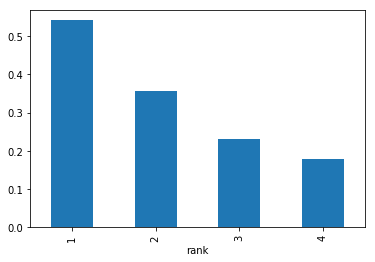

In [47]:
percentdf.iloc[1].plot(kind = 'bar') 


C:\Users\ekzc5h6\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=1.0, right=1.0
  'left=%s, right=%s') % (left, right))
C:\Users\ekzc5h6\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=1.0, top=1.0
  'bottom=%s, top=%s') % (bottom, top))


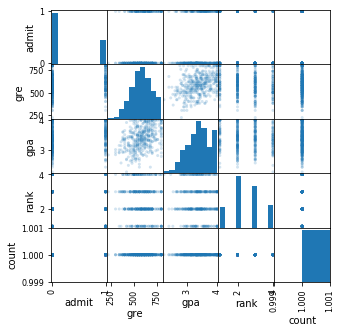

In [49]:
#4. What does the distribution of the GPA and GRE scores look like? Do the distributions differ much?

scatter_matrix(df, alpha= 0.2, figsize =(5,5))
None



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF32630>]], dtype=object)

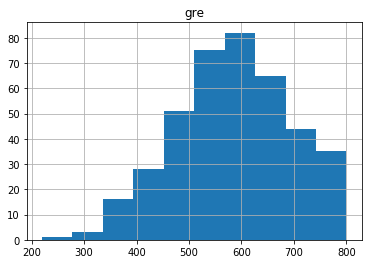

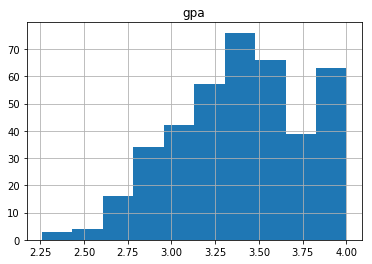

In [62]:
df.hist(column='gre') 
df.hist(column='gpa') 

In [53]:
#5. One of the issues with classification can be unbalanced classes.
#What percentage of the data was admitted? Do you think this will be a problem?

#added count column, dropped unnecessary columns

totaldf = dfmod.groupby('rank').sum()

#totaldf['percent'] = totaldf['admit'] / totaldf['count']

totaldf.head()

admit  count   percent
rank                        
1        33     61  0.540984
2        54    151  0.357616
3        28    121  0.231405
4        12     67  0.179104

In [60]:
#% admitted
totaldf['admit'].sum() /  totaldf['count'].sum()

0.3175

In [63]:
#6. Perform a Logistic Regression. (Do you need to change the `rank` column?)

dfdummy = dummify(df,('rank'))
dfdummy.head()


admit  gre   gpa  count  rank_1  rank_2  rank_3
0      0  380  3.61      1       0       0       1
1      1  660  3.67      1       0       0       1
2      1  800  4.00      1       1       0       0
3      1  640  3.19      1       0       0       0
4      0  520  2.93      1       0       0       0

In [72]:
rows = []
for i in range(1,5):    
    combos = list(combinations(['gre','gpa','rank_1','rank_2', 'rank_3'],i))    
    for combo in combos:        
        model = LogisticRegression(fit_intercept=True)        
        accuracy = cross_val_score(model, dfdummy[list(combo)], dfdummy.admit, cv=10, scoring='accuracy').mean()        
        rows.append({'Accuracy': accuracy, 'Columns': combo})
df1 = pd.DataFrame(rows)
df1

Accuracy                        Columns
0   0.682570                         (gre,)
1   0.682570                         (gpa,)
2   0.684817                      (rank_1,)
3   0.682570                      (rank_2,)
4   0.682570                      (rank_3,)
5   0.682570                     (gre, gpa)
6   0.689759                  (gre, rank_1)
7   0.682570                  (gre, rank_2)
8   0.674878                  (gre, rank_3)
9   0.714576                  (gpa, rank_1)
10  0.682570                  (gpa, rank_2)
11  0.682570                  (gpa, rank_3)
12  0.670000               (rank_1, rank_2)
13  0.684817               (rank_1, rank_3)
14  0.682570               (rank_2, rank_3)
15  0.687320             (gre, gpa, rank_1)
16  0.682570             (gre, gpa, rank_2)
17  0.680006             (gre, gpa, rank_3)
18  0.687259          (gre, rank_1, rank_2)
19  0.689759          (gre, rank_1, rank_3)
20  0.677567          (gre, rank_2, rank_3)
21  0.704512          (gpa, rank_1, rank_2)
22  0.714576          (gpa, rank_1, rank_3)
23  0.682570          (gpa, rank_2, rank_3)
24  0.670000       (rank_1, rank_2, rank_3)
25  0.692259     (gre, gpa, rank_1, rank_2)
26  0.692259     (gre, gpa, rank_1, rank_3)
27  0.677567     (gre, gpa, rank_2, rank_3)
28  0.689759  (gre, rank_1, rank_2, rank_3)
29  0.707076  (gpa, rank_1, rank_2, rank_3)

In [ ]:
#(gpa, rank_1)
#accuracy = 71.45%

In [79]:
#9. What is better to have, a higher recall or precison in the context of admitting someone into graduate school.
ml = LogisticRegression().fit(dfdummy[['gpa','rank_1']], dfdummy.admit)

y = dfdummy.admit
X = dfdummy[['gpa','rank_1']]

In [77]:
#Train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [80]:
#pass in test into model
y_hat= ml.predict(X_test)

In [81]:
#TN, FP, FN, TP
confusion_matrix(y_test, y_hat)

array([[88,  2],
       [32, 10]], dtype=int64)

In [82]:
#recall = TP / (TP + FN)
recall = 10 / (10 + 32)

#precision = TP / (TP + FP)
precision = 10 / (10 + 2)

#accuracy =(TN + TP) / (TN + TP + FN + FP)
accuracy =(88 + 10) / (88 + 10 + 32 + 37)

print("Recall is ", recall, " Precision is ", precision, " Accuracy is ", accuracy)

Recall is  0.23809523809523808  Precision is  0.8333333333333334  Accuracy is  0.5868263473053892
